# Regressione lineare polinomiale con scikit-learn
La regressione polinomiale ci permette di stabilire una relazione tra la  variabile dipendente y e la variabile indipendente x tramite un polinomio di quest'ultima.<br>
In questo notebook eseguiremo una regrezione polinomiale sul Boston Housing Dataset.<br>
Importiamo le librerie necessarie.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

E carichiamo il dataset all'interno di un DataFrame

In [2]:
boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', 
                     names=["CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Regressione polinomiale su una proprietà
Cominciamo eseguendo una regressione polinomiale su di un unica proprietà.<br>
Nel precedente laboratorio avevamo visto che RM, LSTAT e PRATIO sono le proprietà maggiormente correlate con MEDV, visualizziamo la correlazione su delle coppie di grafici.

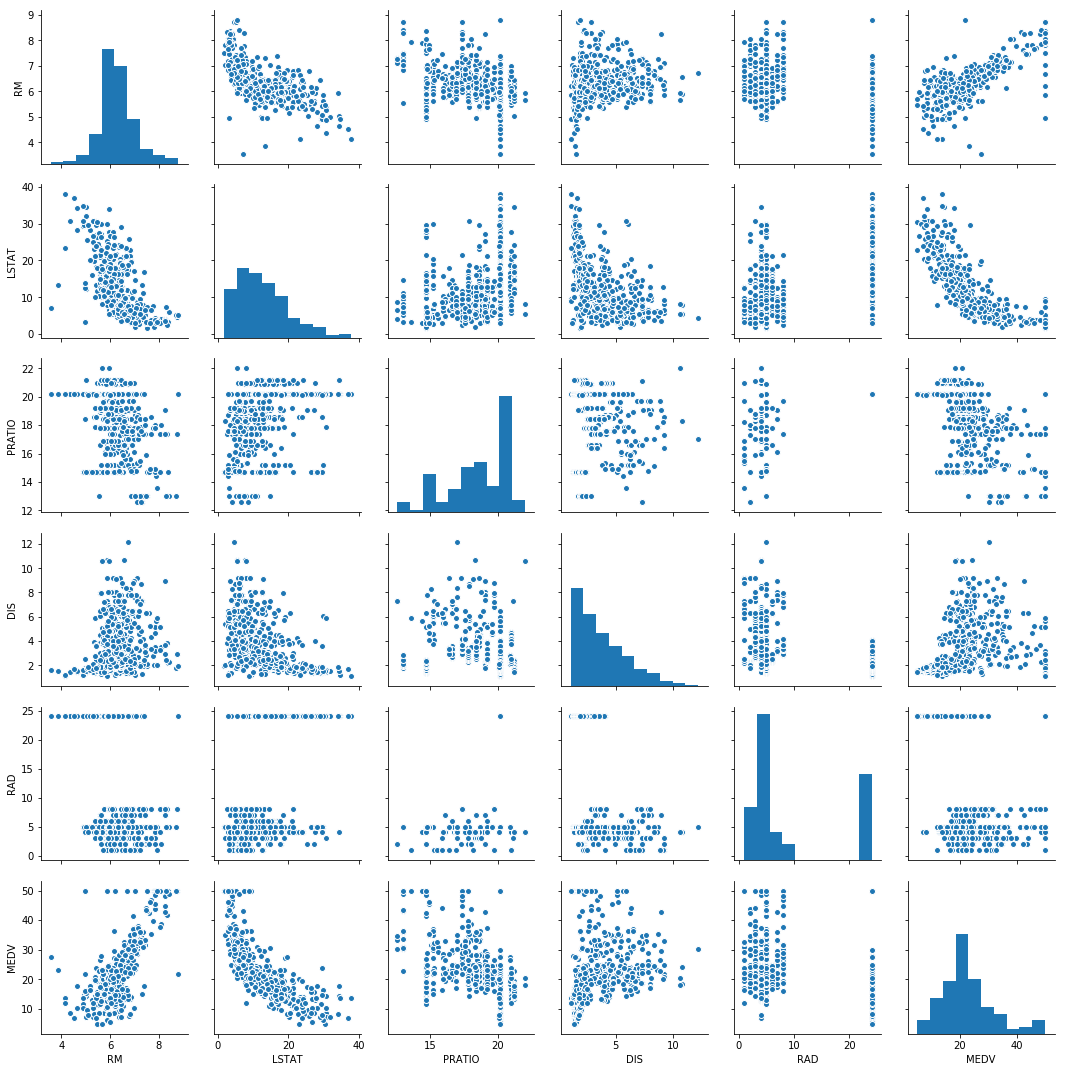

In [3]:
cols = ["RM","LSTAT","PRATIO","DIS","RAD","MEDV"]
sns.pairplot(boston[cols])

La correlazione tra LSTAT e MEDV è chiaramente non lineare, infatti osservando il secondo grafico della quarta riga si può vedere che essa è distribuita lungo una curva.<br>
Bene, utilizziamo LSTAT per eseguire una regressione polinomiale, creiamo i nostri train set e test set.

In [5]:
X = boston['LSTAT'].values
Y = boston['MEDV'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

Per eseguire una regressione lineare polinomiale dobbiamo creare delle nuove proprietà polinomiali, con scikit-learn possiamo farlo utilizzando la classe PolynomialFeatures, il resto del processo è esattamente lo stesso.<br>
Eseguiamo 10 diverse regressioni polinomiali, dal grado 1 (regressione lineare semplice) al grado 10, dopodichè confrontiamo il loro MSE e R2 score.

In [6]:
from sklearn.preprocessing import PolynomialFeatures

scores = []

for i in range(1,11):for
    polyfeats = PolynomialFeatures(degree=i)
    X_train_poly = polyfeats.fit_transform(X_train)
    X_test_poly = polyfeats.transform(X_test)
    ll = LinearRegression()
    ll.fit(X_train_poly, Y_train)
    Y_pred = ll.predict(X_test_poly)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    scores.append(r2)
    print("DEGREE "+str(i)+": MSE="+str(mse)+" R2="+str(r2))

ValueError: Expected 2D array, got 1D array instead:
array=[34.41  7.73 16.96  4.97 17.93 18.72 13.09 21.02 26.45 10.26  4.59  5.25
  8.05 12.79  7.7   7.22  7.79 16.35  4.38 24.91 14.65  5.5  13.34 21.78
 15.1  21.14 11.66  9.43 16.23 14.52  9.8  11.64 18.66  5.08  9.5   5.99
  4.45 16.22 23.98 11.25  5.7  11.5   3.16  6.21  9.5  14.13  5.98  3.01
  8.16 11.69  7.26  6.62 27.8   6.43 14.1   5.9  10.58 12.14  6.53  9.54
 18.05 10.24 11.72 24.08 24.16  7.67 15.17  4.03 20.08 21.46 14.67 16.65
  9.25 13.27 22.6  10.45  6.36 13.44 19.01  7.9  10.11  3.53 12.04 11.1
 19.52 14.37  8.1  16.21  5.29  6.36 10.29 16.9   5.1   5.49  9.45 27.26
  7.85 20.34 34.37 21.24 17.16  2.47 15.03 18.35  7.01  9.55 14.44  4.56
  6.59  9.51 17.92  7.54  9.68 23.79 11.98  7.12 10.53 16.94  9.69 17.28
 21.32  6.27 16.14  9.74 23.6  21.32 16.03 12.33  8.05  5.98  5.57  9.47
 22.88  5.39 29.55  2.88  8.05  6.9   8.1  16.3  13.51  7.6  18.34 10.16
  3.7  14.1  29.97  1.98  3.53 14.19  9.1  18.33 10.36  8.26  7.14 36.98
 14.33  3.92  1.73  7.51  5.64 13.11 13.   21.45 12.12  6.58  7.18 15.55
 23.34 18.46  4.73  9.59 10.19 15.94  9.67 22.98  9.52  7.83 17.11 11.28
  9.97  7.39 13.65  3.13 15.17  2.94  4.5  14.81  3.76 12.93 10.27 13.98
 17.21 10.42  2.98 10.4  16.59  4.82 16.74  5.29  7.53  7.79 13.27 13.44
 12.86 14.79 11.41 14.98  6.86  4.84 13.   13.45 23.09 20.31 20.32 15.7
 25.41  9.93  6.73 21.08 12.6   6.68 19.88  7.44 16.44  4.98  7.43  3.26
 12.03  3.57  5.89  6.93 12.01  6.92  3.73  3.11 10.59 12.87  6.65 18.13
 11.32  8.79  8.93 30.81  5.49 34.77 19.92 18.06  4.85  6.36 28.32 26.42
  6.75  7.56 17.6  12.26 18.71  6.48  5.91  6.12  3.81  9.62 14.27 18.06
 22.11 17.15 16.42 30.63  8.2   6.72  7.44 13.61 11.48  3.56  3.95 24.39
  6.87  5.12 23.24 17.27  5.81 16.47 30.62 16.29  6.58 17.44 10.13 20.85
  8.43 15.02 18.85 15.39  3.33 12.8   5.68  2.96  3.32 13.28 12.5   3.11
 13.04 27.71 17.19 13.15 18.68 19.31  7.6  23.29 30.59 13.99 29.53  8.23
 29.68  6.29  6.19  8.51 18.13 19.69  8.01  8.61  5.19 13.22 15.76 27.38
 10.45  5.52  5.68 16.51  9.81 10.56 23.97  9.64 13.35  4.32  5.03  9.28
 19.37  5.5  14.36  6.72  8.44  4.7  11.22  4.16 23.98 17.1  12.67  2.97
  3.59 11.74  2.87 10.3  18.8  14.69].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Il nostro modello migliora fino al grado 4, poi comincia ad oscillare ed a peggiorare. Il miglioramente del modello utilizzando una regressione polinomiale è evidente, prendendo come esempio l'R2 score, al grado 1 questo è di appena 0.5218 per arrivare fino ad 0.6416 al grado 4, utilizzando un unica proprietà !

## Regressione polinomiale su tutte le proprietà

In [27]:
X = boston.drop('MEDV',axis=1).values
Y = boston['MEDV'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [29]:
from sklearn.preprocessing import PolynomialFeatures

scores = []

for i in range(1,5):
    polyfeats = PolynomialFeatures(degree=i)
    X_train_poly = polyfeats.fit_transform(X_train)
    X_test_poly = polyfeats.transform(X_test)
    ll = LinearRegression()
    ll.fit(X_train_poly, Y_train)
    Y_pred = ll.predict(X_test_poly)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    scores.append(r2)
    print("DEGREE "+str(i)+": MSE="+str(mse)+" R2="+str(r2))

DEGREE 1: MSE=27.19596576688344 R2=0.6733825506400167
DEGREE 2: MSE=29.0041739064611 R2=0.6516663764278848
DEGREE 3: MSE=85912.07711300855 R2=-1030.7847778010594
DEGREE 4: MSE=546667.2171234796 R2=-6564.350671348943
